# Previsone dei prossimi 6 anni di consumi elettrici e di gas in base alle temperature massime e minime dal 2018 al 2023

In [1]:
#LIBRERIE
import pandas as pd # gestione dei dati 
# Calcolo dei valori da utilizzare in samirax
import pmdarima as pm
from pmdarima.model_selection import train_test_split
from pmdarima.arima.utils import ndiffs
# Modello Sarimax
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
#Grafici
import matplotlib.pyplot as plt
import seaborn as sns

### Caricamento, pulizia e manipolazione dati temperature 

In [2]:
# Caricamento valori del dataset 'TEMPERATURE.xlsx'
temp = pd.read_excel('TEMPERATURE.xlsx') #carico dataset temperature
temp = temp.query('anno not in [2015, 2016, 2017]')#pulizia anni non utilizzati 
temp['anno'] = temp['anno'].astype(int)# converto anno in intero 
temp_arima = temp.drop('temperatura_media_per_anno', axis=1) # rimozione colonna 'temperatura_media_per_anno' dal DataFrame temp

### Caricamento, pulizia e manipolazione dati Elettrici

In [3]:
# Caricamento dataset "consumi energia elettrica modello arima.csv"
cons_elet = pd.read_csv("consumi energia elettrica modello arima.csv", sep=';') # carico dataset 
# Lista delle regioni italiane
regioni_italiane = ['Abruzzo', 'Basilicata', 'Calabria', 'Campania', 'Emilia-Romagna', 
                     'Friuli-Venezia Giulia', 'Lazio', 'Liguria', 'Lombardia', 'Marche', 
                     'Molise', 'Piemonte', 'Puglia', 'Sardegna', 'Sicilia', 'Toscana', 
                     'Trentino-Alto Adige/Südtirol', 'Umbria', 'Valle d\'Aosta/Vallée d\'Aoste', 'Veneto']

# Filtra il DataFrame in base alle regioni italiane
cons_elet_cleen = cons_elet[cons_elet['capoluoghi'].isin(regioni_italiane)]
#Sostituzione dei capoluoghi per dataset finale 
cons_elet_cleen['capoluoghi'] = cons_elet_cleen['capoluoghi'].replace('Abruzzo', 'ABRUZZO')
cons_elet_cleen['capoluoghi'] = cons_elet_cleen['capoluoghi'].replace('Basilicata', 'BASILICATA')
cons_elet_cleen['capoluoghi'] = cons_elet_cleen['capoluoghi'].replace('Calabria', 'CALABRIA')
cons_elet_cleen['capoluoghi'] = cons_elet_cleen['capoluoghi'].replace('Campania', 'CAMPANIA')
cons_elet_cleen['capoluoghi'] = cons_elet_cleen['capoluoghi'].replace('Emilia-Romagna', 'EMILIA ROMAGNA')
cons_elet_cleen['capoluoghi'] = cons_elet_cleen['capoluoghi'].replace('Friuli-Venezia Giulia', 'FRIULI')
cons_elet_cleen['capoluoghi'] = cons_elet_cleen['capoluoghi'].replace('Lazio', 'LAZIO')
cons_elet_cleen['capoluoghi'] = cons_elet_cleen['capoluoghi'].replace('Liguria', 'LIGURIA')
cons_elet_cleen['capoluoghi'] = cons_elet_cleen['capoluoghi'].replace('Lombardia', 'LOMBARDIA')
cons_elet_cleen['capoluoghi'] = cons_elet_cleen['capoluoghi'].replace('Marche', 'MARCHE')
cons_elet_cleen['capoluoghi'] = cons_elet_cleen['capoluoghi'].replace('Molise', 'MOLISE')
cons_elet_cleen['capoluoghi'] = cons_elet_cleen['capoluoghi'].replace('Piemonte', 'PIEMONTE')
cons_elet_cleen['capoluoghi'] = cons_elet_cleen['capoluoghi'].replace('Puglia', 'PUGLIA')
cons_elet_cleen['capoluoghi'] = cons_elet_cleen['capoluoghi'].replace('Sardegna', 'SARDEGNA')
cons_elet_cleen['capoluoghi'] = cons_elet_cleen['capoluoghi'].replace('Sicilia', 'SICILIA')
cons_elet_cleen['capoluoghi'] = cons_elet_cleen['capoluoghi'].replace('Toscana', 'TOSCANA')
cons_elet_cleen['capoluoghi'] = cons_elet_cleen['capoluoghi'].replace('Trentino-Alto Adige/Südtirol', 'TRENTINO ALTO ADIGE')
cons_elet_cleen['capoluoghi'] = cons_elet_cleen['capoluoghi'].replace('Umbria', 'UMBRIA')
cons_elet_cleen['capoluoghi'] = cons_elet_cleen['capoluoghi'].replace('Valle d\'Aosta/Vallée d\'Aoste', 'VALLE D AOSTA')
cons_elet_cleen['capoluoghi'] = cons_elet_cleen['capoluoghi'].replace('Veneto', 'VENETO')

cons_elet_ord_cleen = cons_elet_cleen.drop(9)#elimino valori doppi 
cons_elet_ord_cleen=cons_elet_ord_cleen.sort_values(by='capoluoghi') #metto in ordine alfabetico 
cons_elet_ord_cleen

<ipython-input-3-05ce0be321bd>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cons_elet_cleen['capoluoghi'] = cons_elet_cleen['capoluoghi'].replace('Abruzzo', 'ABRUZZO')
<ipython-input-3-05ce0be321bd>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cons_elet_cleen['capoluoghi'] = cons_elet_cleen['capoluoghi'].replace('Basilicata', 'BASILICATA')
<ipython-input-3-05ce0be321bd>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

,capoluoghi,2018,2019,2020,2021,2022,2023
85,ABRUZZO,"5.953,60","6.068,30","6283,1","6161,7","5881,4","6158,1"
104,BASILICATA,"2.515,50","2.607,80","2711,1","2786,3","2593,6","2745,8"
110,CALABRIA,"5.016,60","5.130,70","5170,8","5064,6","4787,8","5045,5"
94,CAMPANIA,"16.180,80","16.535,40","16778,7","16601,8",15824,"16486,4"
54,EMILIA ROMAGNA,"26.626,50","27.377,20","28415,2","27583,4","26182,7","27912,6"
44,FRIULI,"9.637,90","9.939,60","10293,3","9902,9",9386,"10078,3"
80,LAZIO,"20.776,20","21.222,70","21627,5","20898,4","19927,1","20634,2"
15,LIGURIA,"5.784,30","5.883,30","6138,1","5886,5","5608,5","5828,2"
28,LOMBARDIA,"63.854,60","65.683,90","67429,1","65703,4","61131,6","65517,1"
74,MARCHE,"6.701,30","6.754,90","6929,8","6727,3","6352,7","6792,5"


In [4]:
#Manipolazione CONSUMI ELETTRICI

df_transposto = cons_elet_ord_cleen.transpose()#trasposta

# Ripristino il nome delle colonne dopo la trasposizione
df_transposto.columns = df_transposto.iloc[0]

# Rimuovo la prima riga che ora contiene i nomi delle colonne
df_transposto = df_transposto[1:]

# Resetto l'indice e rinomino le colonne
df_transposto = df_transposto.reset_index().rename(columns={'index': 'anno'})

# Fondo il dataset per ottenere la struttura desiderata
df_melted = pd.melt(df_transposto, id_vars=['anno'], var_name='sds_regione', value_name='Consumi elettrici')

# Ordino il dataset in base alle colonne 'sds_regione' e 'anno'
df_melted = df_melted.sort_values(by=['sds_regione', 'anno'])

# Stampa il risultato
print(df_melted)

     anno sds_regione Consumi elettrici
0    2018     ABRUZZO          5.953,60
1    2019     ABRUZZO          6.068,30
2    2020     ABRUZZO            6283,1
3    2021     ABRUZZO            6161,7
4    2022     ABRUZZO            5881,4
..    ...         ...               ...
115  2019      VENETO         30.017,90
116  2020      VENETO           30964,9
117  2021      VENETO           30411,2
118  2022      VENETO           28787,7
119  2023      VENETO           30857,9

[120 rows x 3 columns]


In [5]:
df_melted['anno'] = pd.to_numeric(df_melted['anno'], errors='coerce')# conversione in numeri 
temp_arima_ele = pd.merge(temp_arima, df_melted, on=['sds_regione', 'anno'], how='left')# unione dei due dataset
temp_arima_ele = temp_arima_ele[temp_arima_ele['sds_regione'] != 'ITALIA']# rimozione delle variabili ITALIA
temp_arima_ele

,sds_regione,anno,temperatura_massima_per_anno,temperatura_minima_per_anno,Consumi elettrici
0,ABRUZZO,2018,18.6,7.3,"5.953,60"
1,ABRUZZO,2019,18.9,7.1,"6.068,30"
2,ABRUZZO,2020,18.1,7.8,"6283,1"
3,ABRUZZO,2021,18.8,8.3,"6161,7"
4,ABRUZZO,2022,17.6,8.1,"5881,4"
...,...,...,...,...,...
121,VENETO,2019,16.4,7.7,"30.017,90"
122,VENETO,2020,17.2,8.7,"30964,9"
123,VENETO,2021,17.6,8.0,"30411,2"
124,VENETO,2022,19.6,7.6,"28787,7"


In [6]:
#Pulizia e conversione in float della colonna consumi 
temp_arima_ele['Consumi elettrici'] = temp_arima_ele['Consumi elettrici'].astype(str)
temp_arima_ele['Consumi elettrici'] = temp_arima_ele['Consumi elettrici'].str.replace('.', '')
temp_arima_ele['Consumi elettrici'] = temp_arima_ele['Consumi elettrici'].str.replace(',', '.')
temp_arima_ele['Consumi elettrici'] = temp_arima_ele['Consumi elettrici'].astype(float)
temp_arima_ele

,sds_regione,anno,temperatura_massima_per_anno,temperatura_minima_per_anno,Consumi elettrici
0,ABRUZZO,2018,18.6,7.3,5953.6
1,ABRUZZO,2019,18.9,7.1,6068.3
2,ABRUZZO,2020,18.1,7.8,6283.1
3,ABRUZZO,2021,18.8,8.3,6161.7
4,ABRUZZO,2022,17.6,8.1,5881.4
...,...,...,...,...,...
121,VENETO,2019,16.4,7.7,30017.9
122,VENETO,2020,17.2,8.7,30964.9
123,VENETO,2021,17.6,8.0,30411.2
124,VENETO,2022,19.6,7.6,28787.7


### Caricamento, pulizia e manipolazione dati Gas

In [7]:
#Caricamento dataset "consumi gas modello arima.csv"
cons_gas = pd.read_csv("consumi gas modello arima.csv", sep=';') #carico dataset
# Lista delle regioni italiane
regioni_italiane = ['Abruzzo', 'Basilicata', 'Calabria', 'Campania', 'Emilia-Romagna', 
                     'Friuli-Venezia Giulia', 'Lazio', 'Liguria', 'Lombardia', 'Marche', 
                     'Molise', 'Piemonte', 'Puglia', 'Sardegna', 'Sicilia', 'Toscana', 
                     'Trentino-Alto Adige/Südtirol', 'Umbria', 'Valle d\'Aosta/Vallée d\'Aoste', 'Veneto']

# Rinomino regioni italiane
cons_gas_cleen = cons_gas[cons_gas['Capoluoghi'].isin(regioni_italiane)]
cons_gas_cleen['Capoluoghi'] = cons_gas_cleen['Capoluoghi'].replace('Abruzzo', 'ABRUZZO')
cons_gas_cleen['Capoluoghi'] = cons_gas_cleen['Capoluoghi'].replace('Basilicata', 'BASILICATA')
cons_gas_cleen['Capoluoghi'] = cons_gas_cleen['Capoluoghi'].replace('Calabria', 'CALABRIA')
cons_gas_cleen['Capoluoghi'] = cons_gas_cleen['Capoluoghi'].replace('Campania', 'CAMPANIA')
cons_gas_cleen['Capoluoghi'] = cons_gas_cleen['Capoluoghi'].replace('Emilia-Romagna', 'EMILIA ROMAGNA')
cons_gas_cleen['Capoluoghi'] = cons_gas_cleen['Capoluoghi'].replace('Friuli-Venezia Giulia', 'FRIULI')
cons_gas_cleen['Capoluoghi'] = cons_gas_cleen['Capoluoghi'].replace('Lazio', 'LAZIO')
cons_gas_cleen['Capoluoghi'] = cons_gas_cleen['Capoluoghi'].replace('Liguria', 'LIGURIA')
cons_gas_cleen['Capoluoghi'] = cons_gas_cleen['Capoluoghi'].replace('Lombardia', 'LOMBARDIA')
cons_gas_cleen['Capoluoghi'] = cons_gas_cleen['Capoluoghi'].replace('Marche', 'MARCHE')
cons_gas_cleen['Capoluoghi'] = cons_gas_cleen['Capoluoghi'].replace('Molise', 'MOLISE')
cons_gas_cleen['Capoluoghi'] = cons_gas_cleen['Capoluoghi'].replace('Piemonte', 'PIEMONTE')
cons_gas_cleen['Capoluoghi'] = cons_gas_cleen['Capoluoghi'].replace('Puglia', 'PUGLIA')
cons_gas_cleen['Capoluoghi'] = cons_gas_cleen['Capoluoghi'].replace('Sardegna', 'SARDEGNA')
cons_gas_cleen['Capoluoghi'] = cons_gas_cleen['Capoluoghi'].replace('Sicilia', 'SICILIA')
cons_gas_cleen['Capoluoghi'] = cons_gas_cleen['Capoluoghi'].replace('Toscana', 'TOSCANA')
cons_gas_cleen['Capoluoghi'] = cons_gas_cleen['Capoluoghi'].replace('Trentino-Alto Adige/Südtirol', 'TRENTINO ALTO ADIGE')
cons_gas_cleen['Capoluoghi'] = cons_gas_cleen['Capoluoghi'].replace('Umbria', 'UMBRIA')
cons_gas_cleen['Capoluoghi'] = cons_gas_cleen['Capoluoghi'].replace('Valle d\'Aosta/Vallée d\'Aoste', 'VALLE D AOSTA')
cons_gas_cleen['Capoluoghi'] = cons_gas_cleen['Capoluoghi'].replace('Veneto', 'VENETO')

cons_gas_ord_cleen = cons_gas_cleen.drop(9) # elimino doppio valle d'aosta
cons_gas_ord_cleen = cons_gas_ord_cleen.sort_values(by='Capoluoghi') # ordino le regioni 
cons_gas_ord_cleen

<ipython-input-7-1e05a10c4432>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cons_gas_cleen['Capoluoghi'] = cons_gas_cleen['Capoluoghi'].replace('Abruzzo', 'ABRUZZO')
<ipython-input-7-1e05a10c4432>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cons_gas_cleen['Capoluoghi'] = cons_gas_cleen['Capoluoghi'].replace('Basilicata', 'BASILICATA')
<ipython-input-7-1e05a10c4432>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

,Capoluoghi,2018,2019,2020,2021,2022,2023
85,ABRUZZO,"675,5","719,6","709,6","700,3","681,5","740,4"
104,BASILICATA,"193,8","207,1","199,1",213,"198,3","224,6"
110,CALABRIA,"279,1","304,1","288,1","305,1","290,8","318,3"
94,CAMPANIA,"1.105,70","1.174,60","1.150,90","1.193,80","1.150,20","1.230,60"
54,EMILIA ROMAGNA,"4.201,70","4.236,40","4.251,30","4.088,70","3.973,30","4.330,10"
44,FRIULI,"858,6","890,2",851,"828,1","814,9","900,7"
80,LAZIO,"2.059,30","2.181,90","2.165,90","2.133,10","2.038,50","2.178,90"
15,LIGURIA,"868,7","889,7","900,2","879,6","863,9","928,4"
28,LOMBARDIA,"8.580,30","8.641,70","8.613,40","8.370,30","8.238,20","8.878,60"
74,MARCHE,"859,1","884,1",903,"859,5","835,9","923,9"


In [8]:
#Manipolazione CONSUMI GAS

df_transposto2 = cons_gas_ord_cleen.transpose()# Trasposta

df_transposto2.columns = df_transposto2.iloc[0]

# Rimuovi la prima riga che ora contiene i nomi delle colonne
df_transposto2 = df_transposto2[1:]

# Reseta l'indice e rinomina le colonne
df_transposto2 = df_transposto2.reset_index().rename(columns={'index': 'anno'})

# Melt il DataFrame per ottenere la struttura desiderata
df_melted2 = pd.melt(df_transposto2, id_vars=['anno'], var_name='sds_regione', value_name='Consumi gas')

# Ordina il DataFrame in base alle colonne 'sds_regione' e 'anno'
df_melted2 = df_melted2.sort_values(by=['sds_regione','anno'])

# Stampa il risultato
print(df_melted2)

     anno sds_regione Consumi gas
0    2018     ABRUZZO       675,5
1    2019     ABRUZZO       719,6
2    2020     ABRUZZO       709,6
3    2021     ABRUZZO       700,3
4    2022     ABRUZZO       681,5
..    ...         ...         ...
115  2019      VENETO    4.134,70
116  2020      VENETO    4.073,80
117  2021      VENETO    3.997,50
118  2022      VENETO    3.897,10
119  2023      VENETO    4.234,40

[120 rows x 3 columns]


In [9]:
# Converto la colonna 'anno' in numeri nei DataFrame df_melted2 e df_melted
df_melted2['anno'] = pd.to_numeric(df_melted2['anno'], errors='coerce')
# Aggiungi le colonne da df_melted2 e df_melted
temp_arima_gas = pd.merge(temp_arima, df_melted2, on=['sds_regione', 'anno'], how='left')
temp_arima_gas = temp_arima_gas[temp_arima_gas['sds_regione'] != 'ITALIA']
temp_arima_gas['Consumi gas'] = temp_arima_gas['Consumi gas'].replace(' - ', 0)


In [10]:
#Pulizia e conversione in float della colonna consumi 
temp_arima_gas['Consumi gas'] = temp_arima_gas['Consumi gas'].astype(str)
temp_arima_gas['Consumi gas'] = temp_arima_gas['Consumi gas'].str.replace('.', '')
temp_arima_gas['Consumi gas'] = temp_arima_gas['Consumi gas'].str.replace(',', '.')
temp_arima_gas['Consumi gas'] = temp_arima_gas['Consumi gas'].astype(float)
temp_arima_gas

,sds_regione,anno,temperatura_massima_per_anno,temperatura_minima_per_anno,Consumi gas
0,ABRUZZO,2018,18.6,7.3,675.5
1,ABRUZZO,2019,18.9,7.1,719.6
2,ABRUZZO,2020,18.1,7.8,709.6
3,ABRUZZO,2021,18.8,8.3,700.3
4,ABRUZZO,2022,17.6,8.1,681.5
...,...,...,...,...,...
121,VENETO,2019,16.4,7.7,4134.7
122,VENETO,2020,17.2,8.7,4073.8
123,VENETO,2021,17.6,8.0,3997.5
124,VENETO,2022,19.6,7.6,3897.1


# Previsione con modello Sarimax 

Consumo Elettrico

In [11]:
# Esegue la valutazione e i parametri migliori da utilizzare nel modello 
train2, test2 = train_test_split(temp_arima_ele['Consumi elettrici'], train_size=0.7)

# Determina il numero di differenziazioni necessarie
d = ndiffs(train2, test='adf')

# Esegui una ricerca automatica per i migliori parametri ARIMA
model2 = pm.auto_arima(train2, d=d, seasonal=False, suppress_warnings=True)

# Stampa i parametri ottimali
print("Parametri ottimali ARIMA:", model2.order)

Parametri ottimali ARIMA: (2, 0, 1)


In [12]:
# Converte le colonne 'anno' in stringhe
temp_arima_ele['anno'] = temp_arima_ele['anno'].astype(str)

# Creazione di un DataFrame per le previsioni
forecast_df = pd.DataFrame(columns=['sds_regione', 'anno', 'previsione_consumi'])

# Itera per ogni regione
for regione in temp_arima_ele['sds_regione'].unique():
    regione_data = temp_arima_ele[temp_arima_ele['sds_regione'] == regione].set_index('anno')
    
    # Ordine del modello SARIMAX
    order_ele = (model2.order)  # Sostituisci con gli ordini appropriati
    
    # Creazione del modello SARIMAX
    model = SARIMAX(regione_data['Consumi elettrici'], 
                    exog=regione_data[['temperatura_massima_per_anno', 'temperatura_minima_per_anno']], 
                    order=order_ele,
                    enforce_stationarity=False,
                    enforce_invertibility=False)
    
    # Fit del modello
    fit_model = model.fit()
    
    # Predizione dei consumi elettrici per i prossimi 6 anni
    forecast_steps_ele = 6
    forecast = fit_model.get_forecast(steps=forecast_steps_ele, 
                                      exog=regione_data[['temperatura_massima_per_anno', 'temperatura_minima_per_anno']])
    
    # Aggiungi le previsioni al DataFrame
    forecast_values = forecast.predicted_mean
    forecast_df_region = pd.DataFrame({'sds_regione': [regione] * forecast_steps_ele,
                                       'anno': np.arange(2024, 2030),
                                       'previsione_consumi': forecast_values.values})
    
    forecast_df = pd.concat([forecast_df, forecast_df_region], ignore_index=True)


forecast_df['previsione_consumi'] = forecast_df['previsione_consumi'].round(1)
# Stampa le previsioni
print(forecast_df)# arrotonda i valori relativi alle previsoni
forecast_df.to_csv('Previsione dei consumi elettrici.csv')


/Users/lucacefaloni/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/lucacefaloni/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/lucacefaloni/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lucacefaloni/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/lucacefaloni/opt/anaconda3/lib/python3.8/site-packages/statsmo

    sds_regione  anno  previsione_consumi
0       ABRUZZO  2024              6011.2
1       ABRUZZO  2025              6055.1
2       ABRUZZO  2026              5967.7
3       ABRUZZO  2027              6236.5
4       ABRUZZO  2028              5905.5
..          ...   ...                 ...
115      VENETO  2025             33378.7
116      VENETO  2026             26443.5
117      VENETO  2027             37676.0
118      VENETO  2028             21958.4
119      VENETO  2029             39948.3

[120 rows x 3 columns]


/Users/lucacefaloni/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


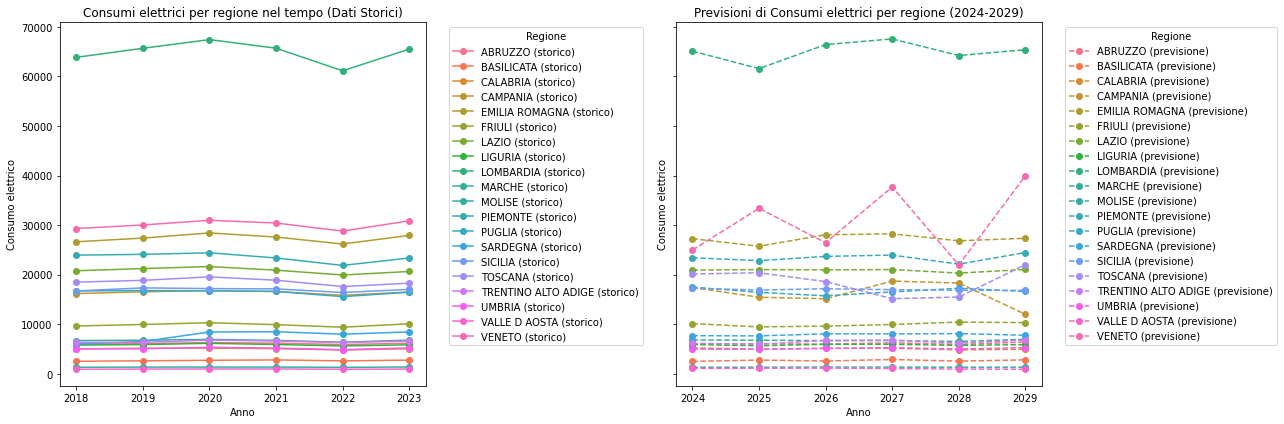

In [13]:
# Seleziona una palette di 20 colori distinti
colors = sns.color_palette('husl', 20)

# Creazione di due subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Grafico per i dati storici
for regione in temp_arima_ele['sds_regione'].unique():
    regione_data = temp_arima_ele[temp_arima_ele['sds_regione'] == regione]
    ax1.plot(regione_data['anno'], regione_data['Consumi elettrici'], marker='o', linestyle='-', label=f'{regione} (storico)', color=colors[temp_arima_ele['sds_regione'].unique().tolist().index(regione)])

ax1.set_title('Consumi elettrici per regione nel tempo (Dati Storici)')
ax1.set_xlabel('Anno')
ax1.set_ylabel('Consumo elettrico')
ax1.legend(title='Regione', bbox_to_anchor=(1.05, 1), loc='upper left')

# Grafico per le previsioni
for regione in forecast_df['sds_regione'].unique():
    forecast_data = forecast_df[forecast_df['sds_regione'] == regione]
    ax2.plot(forecast_data['anno'], forecast_data['previsione_consumi'], marker='o', linestyle='--', label=f'{regione} (previsione)', color=colors[temp_arima_ele['sds_regione'].unique().tolist().index(regione)])

ax2.set_title('Previsioni di Consumi elettrici per regione (2024-2029)')
ax2.set_xlabel('Anno')
ax2.set_ylabel('Consumo elettrico')
ax2.legend(title='Regione', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostra il grafico
plt.tight_layout()
plt.show()


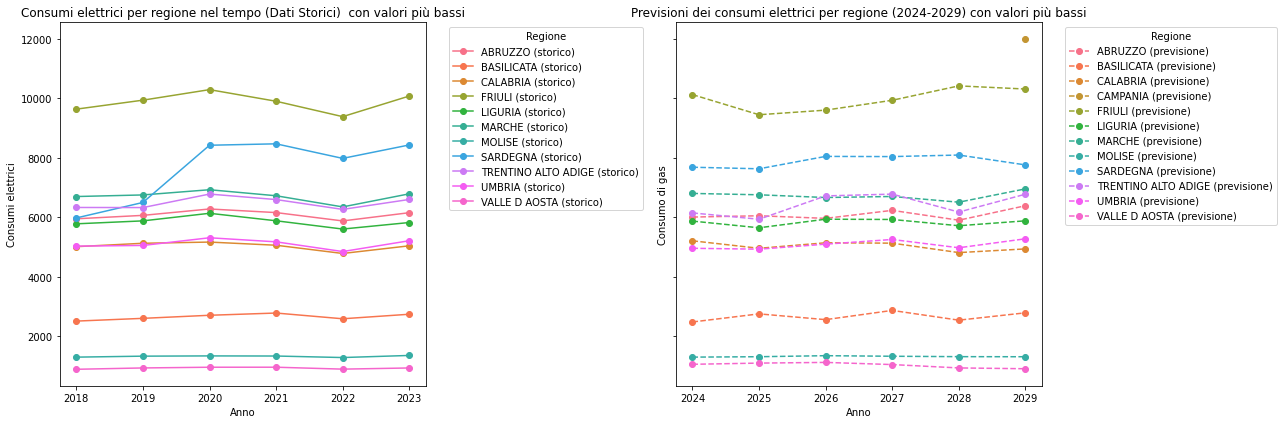

In [14]:
# Seleziona una palette di 20 colori distinti
colors = sns.color_palette('husl', 20)

# Creazione di due subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), sharey=True)


# Calcola il massimo e la media della colonna 'Consumi gas'
min_consumption = temp_arima_ele['Consumi elettrici'].min()
mean_consumption = temp_arima_ele['Consumi elettrici'].mean()

# Filtra il dataset nel range desiderato
massimo_media_data = temp_arima_ele[(temp_arima_ele['Consumi elettrici'] >= min_consumption) & (temp_arima_ele['Consumi elettrici'] <= mean_consumption)]

# Grafico per i dati storici di gas
for regione in massimo_media_data['sds_regione'].unique():
    regione_data_gas = massimo_media_data[massimo_media_data['sds_regione'] == regione]
    ax1.plot(regione_data_gas['anno'], regione_data_gas['Consumi elettrici'], marker='o', linestyle='-', label=f'{regione} (storico)', color=colors[temp_arima_gas['sds_regione'].unique().tolist().index(regione)])

ax1.set_title('Consumi elettrici per regione nel tempo (Dati Storici)  con valori più bassi')
ax1.set_xlabel('Anno')
ax1.set_ylabel('Consumi elettrici')
ax1.legend(title='Regione', bbox_to_anchor=(1.05, 1), loc='upper left')


# Calcola il massimo e la media della colonna 'Consumi gas'
min_consumption_fore = forecast_df['previsione_consumi'].min()
mean_consumption_fore = forecast_df['previsione_consumi'].mean()
# Filtra il dataset nel range desiderato
massimo_media_fore = forecast_df[(forecast_df['previsione_consumi'] >= min_consumption_fore) & (forecast_df['previsione_consumi'] <=  mean_consumption_fore)]
# Grafico per le previsioni di gas
for regione in massimo_media_fore['sds_regione'].unique():
    forecast_data_gas = massimo_media_fore[massimo_media_fore['sds_regione'] == regione]
    ax2.plot(forecast_data_gas['anno'], forecast_data_gas['previsione_consumi'], marker='o', linestyle='--', label=f'{regione} (previsione)', color=colors[temp_arima_gas['sds_regione'].unique().tolist().index(regione)])

ax2.set_title('Previsioni dei consumi elettrici per regione (2024-2029) con valori più bassi')
ax2.set_xlabel('Anno')
ax2.set_ylabel('Consumo di gas')
ax2.legend(title='Regione', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostra il grafico
plt.tight_layout()
plt.show()

Consumo gas

In [15]:

#Calcola il miglior set di valori "order" per il modello arima 
# Esegui una divisione tra dati di addestramento e dati di test
train, test = train_test_split(temp_arima_gas['Consumi gas'], train_size=0.8)

# Determina il numero di differenziazioni necessarie
d = ndiffs(train, test='adf')

# Esegui una ricerca automatica per i migliori parametri ARIMA
model = pm.auto_arima(train, d=d, seasonal=False, suppress_warnings=True)

# Stampa i parametri ottimali
print("Parametri ottimali ARIMA:", model.order)


Parametri ottimali ARIMA: (3, 0, 4)


In [16]:

# Converte le colonne 'anno' in stringhe
temp_arima_gas['anno'] = temp_arima_gas['anno'].astype(str)

# Creazione di un DataFrame per le previsioni
forecast_gas_df = pd.DataFrame(columns=['sds_regione', 'anno', 'previsione_consumi_gas'])

# Itera per ogni regione
for regione in temp_arima_gas['sds_regione'].unique():
    regione_data_gas = temp_arima_gas[temp_arima_gas['sds_regione'] == regione].set_index('anno')
    
    # Ordine del modello SARIMAX (sostituisci con gli ordini appropriati)
    order_gas = (model.order)
    
    # Creazione del modello SARIMAX per il gas
    model_gas = SARIMAX(regione_data_gas['Consumi gas'], 
                        exog=regione_data_gas[['temperatura_massima_per_anno', 'temperatura_minima_per_anno']], 
                        order=order_gas,
                        enforce_stationarity=False,
                        enforce_invertibility=False)
    
    # Fit del modello per il gas
    fit_model_gas = model_gas.fit()
    
    # Predizione dei consumi di gas per i prossimi 6 anni
    forecast_steps_gas = 6
    forecast_gas = fit_model_gas.get_forecast(steps=forecast_steps_gas, 
                                              exog=regione_data_gas[['temperatura_massima_per_anno', 'temperatura_minima_per_anno']])
    
    # Aggiungi le previsioni per il gas al DataFrame
    forecast_values_gas = forecast_gas.predicted_mean
    forecast_gas_df_region = pd.DataFrame({'sds_regione': [regione] * forecast_steps_gas,
                                           'anno': np.arange(2024, 2030),
                                           'previsione_consumi_gas': forecast_values_gas.values})
    
    forecast_gas_df = pd.concat([forecast_gas_df, forecast_gas_df_region], ignore_index=True)
forecast_gas_df['previsione_consumi_gas'] = forecast_gas_df['previsione_consumi_gas'].round(1)
print(forecast_gas_df) # arrotonda i valori relativi alle previsoni
forecast_gas_df.to_csv('Previsione dei consumi gas.csv')

/Users/lucacefaloni/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/lucacefaloni/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/lucacefaloni/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/lucacefaloni/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)

    sds_regione  anno  previsione_consumi_gas
0       ABRUZZO  2024                   698.0
1       ABRUZZO  2025                   705.9
2       ABRUZZO  2026                   689.2
3       ABRUZZO  2027                   718.5
4       ABRUZZO  2028                   677.1
..          ...   ...                     ...
115      VENETO  2025                  4145.4
116      VENETO  2026                  3988.7
117      VENETO  2027                  4384.7
118      VENETO  2028                  4005.9
119      VENETO  2029                  4099.6

[120 rows x 3 columns]


/Users/lucacefaloni/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


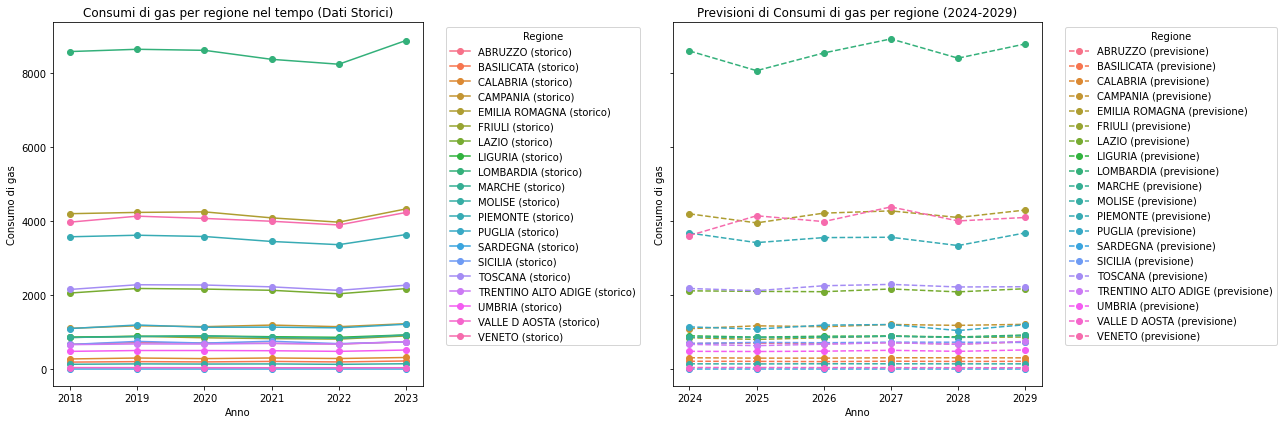

In [19]:
# Seleziona una palette di 20 colori distinti
colors = sns.color_palette('husl', 20)

# Creazione di due subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Grafico per i dati storici di gas
for regione in temp_arima_gas['sds_regione'].unique():
    regione_data_gas = temp_arima_gas[temp_arima_gas['sds_regione'] == regione]
    ax1.plot(regione_data_gas['anno'], regione_data_gas['Consumi gas'], marker='o', linestyle='-', label=f'{regione} (storico)', color=colors[temp_arima_gas['sds_regione'].unique().tolist().index(regione)])

ax1.set_title('Consumi di gas per regione nel tempo (Dati Storici)')
ax1.set_xlabel('Anno')
ax1.set_ylabel('Consumo di gas')
ax1.legend(title='Regione', bbox_to_anchor=(1.05, 1), loc='upper left')

# Grafico per le previsioni di gas
for regione in forecast_gas_df['sds_regione'].unique():
    forecast_data_gas = forecast_gas_df[forecast_gas_df['sds_regione'] == regione]
    ax2.plot(forecast_data_gas['anno'], forecast_data_gas['previsione_consumi_gas'], marker='o', linestyle='--', label=f'{regione} (previsione)', color=colors[temp_arima_gas['sds_regione'].unique().tolist().index(regione)])

ax2.set_title('Previsioni di Consumi di gas per regione (2024-2029)')
ax2.set_xlabel('Anno')
ax2.set_ylabel('Consumo di gas')
ax2.legend(title='Regione', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostra il grafico
plt.tight_layout()
plt.show()

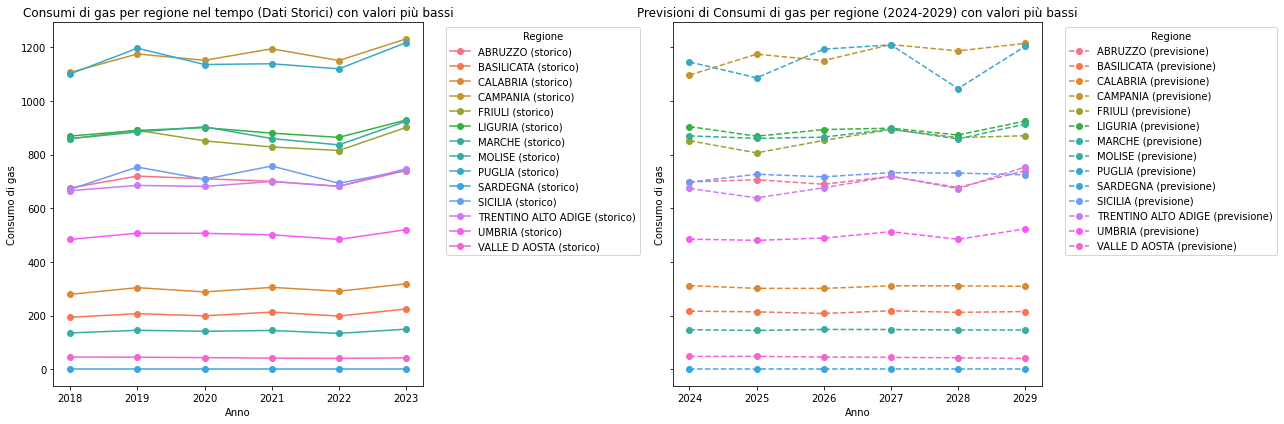

In [18]:
#Grafico consumo gas 
# Seleziona una palette di 20 colori distinti
colors = sns.color_palette('husl', 20)

# Creazione di due subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), sharey=True)


# Calcola il massimo e la media della colonna 'Consumi gas'
min_consumption = temp_arima_gas['Consumi gas'].min()
mean_consumption = temp_arima_gas['Consumi gas'].mean()

# Filtra il dataset nel range desiderato
massimo_media_data = temp_arima_gas[(temp_arima_gas['Consumi gas'] >= min_consumption) & (temp_arima_gas['Consumi gas'] <= mean_consumption)]

# Grafico per i dati storici di gas
for regione in massimo_media_data['sds_regione'].unique():
    regione_data_gas = massimo_media_data[massimo_media_data['sds_regione'] == regione]
    ax1.plot(regione_data_gas['anno'], regione_data_gas['Consumi gas'], marker='o', linestyle='-', label=f'{regione} (storico)', color=colors[temp_arima_gas['sds_regione'].unique().tolist().index(regione)])

ax1.set_title('Consumi di gas per regione nel tempo (Dati Storici) con valori più bassi')
ax1.set_xlabel('Anno')
ax1.set_ylabel('Consumo di gas')
ax1.legend(title='Regione', bbox_to_anchor=(1.05, 1), loc='upper left')


# Calcola il massimo e la media della colonna 'Consumi gas'
min_consumption_fore = forecast_gas_df['previsione_consumi_gas'].min()
mean_consumption_fore = forecast_gas_df['previsione_consumi_gas'].mean()
# Filtra il dataset nel range desiderato
massimo_media_fore = forecast_gas_df[(forecast_gas_df['previsione_consumi_gas'] >= min_consumption_fore) & (forecast_gas_df['previsione_consumi_gas'] <=  mean_consumption_fore)]
# Grafico per le previsioni di gas
for regione in massimo_media_fore['sds_regione'].unique():
    forecast_data_gas = massimo_media_fore[massimo_media_fore['sds_regione'] == regione]
    ax2.plot(forecast_data_gas['anno'], forecast_data_gas['previsione_consumi_gas'], marker='o', linestyle='--', label=f'{regione} (previsione)', color=colors[temp_arima_gas['sds_regione'].unique().tolist().index(regione)])

ax2.set_title('Previsioni di Consumi di gas per regione (2024-2029) con valori più bassi')
ax2.set_xlabel('Anno')
ax2.set_ylabel('Consumo di gas')
ax2.legend(title='Regione', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostra il grafico
plt.tight_layout()
plt.show()